In [2]:
!pip install osmnx

  Using cached osmnx-1.3.0-py3-none-any.whl (93 kB)
  Using cached matplotlib-3.7.1-cp39-cp39-win_amd64.whl (7.6 MB)
  Using cached importlib_resources-5.12.0-py3-none-any.whl (36 kB)
  Using cached contourpy-1.0.7-cp39-cp39-win_amd64.whl (160 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
anaconda-project 0.10.1 requires ruamel-yaml, which is not installed.
scipy 1.7.1 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.24.3 which is incompatible.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.24.3 which is incompatible.


      Successfully uninstalled numpy-1.20.3
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.4
    Uninstalling pandas-1.3.4:
      Successfully uninstalled pandas-1.3.4
  Attempting uninstall: requests
    Found existing installation: requests 2.26.0
    Uninstalling requests-2.26.0:
      Successfully uninstalled requests-2.26.0
  Attempting uninstall: networkx
    Found existing installation: networkx 2.6.3
    Uninstalling networkx-2.6.3:
      Successfully uninstalled networkx-2.6.3
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.4.3
    Uninstalling matplotlib-3.4.3:
      Successfully uninstalled matplotlib-3.4.3


In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import osmnx as ox
import geopandas as gpd
import requests, fiona
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline
ox.config(log_console=True, use_cache=True)
ox.__version__

C:\Users\ramak\anaconda3\envs\ox\Lib\site-packages\osmnx\utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(


'1.3.0'

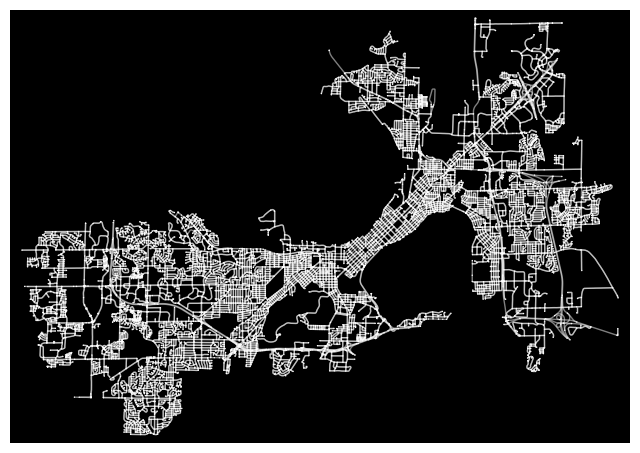

C:\Users\ramak\anaconda3\envs\ox\Lib\site-packages\osmnx\io.py:87: UserWarning: The `save_graph_shapefile` function is deprecated and will be removed in a future release. Instead, use the `save_graph_geopackage` function to save graphs as GeoPackage files for subsequent GIS analysis.
  warnings.warn(
C:\Users\ramak\anaconda3\envs\ox\Lib\site-packages\osmnx\io.py:114: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, driver="ESRI Shapefile", index=True, encoding=encoding)


In [2]:
G = ox.graph_from_place("Madison, Wisconsin", network_type='drive')
fig, ax = ox.plot_graph(G, bgcolor = 'k', edge_color = 'white', node_color = '#fff',
                        edge_linewidth=1, edge_alpha = 0.5, node_size = 1)

ox.save_graph_shapefile(G, 'Madison')

In [ ]:
edge_centrality_closeness = nx.closeness_centrality(nx.line_graph(G))

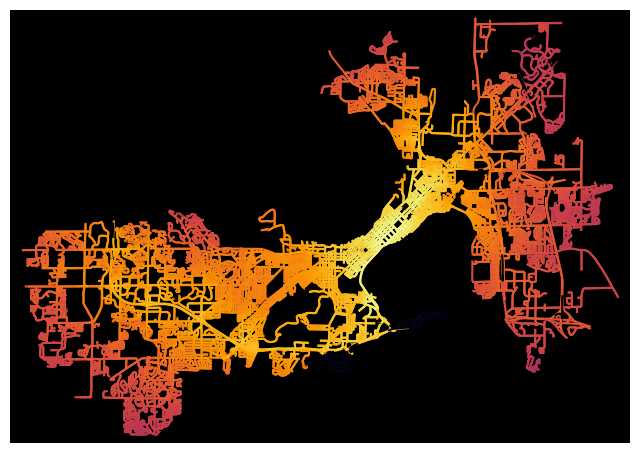

In [4]:
# list of edge values for the orginal graph
ev = [edge_centrality_closeness[edge + (0,)] for edge in G.edges()]

# color scale converted to list of colors for graph edges
norm = colors.Normalize(vmin=min(ev)*0.8, vmax=max(ev))
cmap = cm.ScalarMappable(norm=norm, cmap=cm.inferno)
ec = [cmap.to_rgba(cl) for cl in ev]


# color the edges in the original graph with closeness centralities in the line graph
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=0, node_color='w', node_edgecolor='gray', node_zorder=2,
                        edge_color=ec, edge_linewidth=1.5, edge_alpha=1, filepath=r"images/edge_centrality_closeness.png", 
                        save=True, show=False, close=True, dpi=300)

# color the edges in the original graph with closeness centralities in the line graph
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=0,
                        edge_color=ec, edge_linewidth=1.5, edge_alpha=1)

Based on the visualization, it can be inferred that the closeness centrality is significantly high in the central region of Madison, near state capitol. This indicates that nodes in the center of the network are closely connected to other nodes via the shortest paths. Consequently, it is easier to navigate through the central part of the city as well as south  city due to the high number of connected nodes, providing better accessibility to various areas within the city.

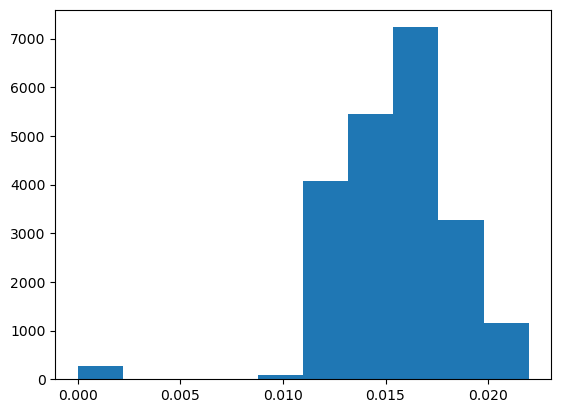

In [5]:
edge_centrality_close_hist = list(edge_centrality_closeness.values())
plt.hist(edge_centrality_close_hist, bins = 10)
plt.savefig(r"images/edge_centrality_close_hist.png")
plt.show()

The histogram for closeness centrality reveals a non-symmetrical left-skewed distribution, indicating that there are more nodes with longer distances and a higher frequency of occurrence.

In [ ]:
edge_centrality_betweenness = nx.betweenness_centrality(nx.line_graph(G))


In [ ]:
# list of edge values for the orginal graph
ev = [edge_centrality_betweenness[edge + (0,)] for edge in G.edges()]

# color scale converted to list of colors for graph edges
norm = colors.Normalize(vmin=min(ev)*0.8, vmax=max(ev))
cmap = cm.ScalarMappable(norm=norm, cmap=cm.inferno)
ec = [cmap.to_rgba(cl) for cl in ev]

# color the edges in the original graph with betweenness centralities in the line graph
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=0, node_color='w', node_edgecolor='gray', node_zorder=2,
                        edge_color=ec, edge_linewidth=1.5, edge_alpha=1, filepath=r"images/edge_centrality_betweenness.png", 
                        save=True, show=False, close=True, dpi=300)

# color the edges in the original graph with betweenness centralities in the line graph
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=0,
                        edge_color=ec, edge_linewidth=1.5, edge_alpha=1)

Betweenness centrality measures how frequently the shortest paths between pairs of nodes in a network pass through a particular node. These shortest paths are typically the fastest routes connecting different regions of Vijayawada,India to the central area. The "inferno" lines in the visualization indicate higher betweenness centrality, indicating that more nodes are connected through the shortest paths that pass through those lines.

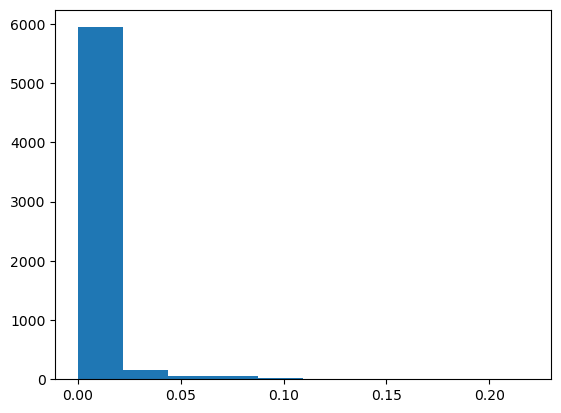

In [14]:
edge_centrality_bet_hist = list(edge_centrality_betweenness.values())
plt.hist(edge_centrality_bet_hist, bins = 10)
plt.savefig(r"images/edge_centrality_close_hist.png")
plt.show()

The histogram for betweenness centrality displays a right-skewed distribution, which implies that there are more nodes with shorter distances and a higher frequency of occurrence.

In [55]:
edge_centrality_degree = nx.degree_centrality(nx.line_graph(G))


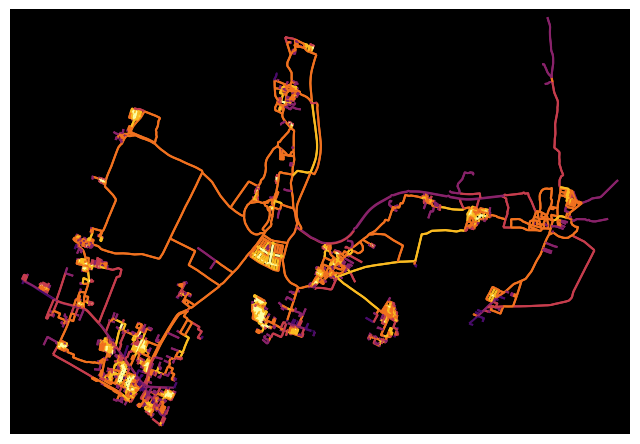

In [45]:
# list of edge values for the orginal graph
ev = [edge_centrality_degree[edge + (0,)] for edge in G.edges()]

# color scale converted to list of colors for graph edges
norm = colors.Normalize(vmin=min(ev)*0.8, vmax=max(ev))
cmap = cm.ScalarMappable(norm=norm, cmap=cm.inferno)
ec = [cmap.to_rgba(cl) for cl in ev]

# color the edges in the original graph with betweenness centralities in the line graph
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=0, node_color='w', node_edgecolor='gray', node_zorder=2,
                        edge_color=ec, edge_linewidth=1.5, edge_alpha=1, filepath=r"images/edge_centrality_degree.png", 
                        save=True, show=False, close=True, dpi=300)

# color the edges in the original graph with betweenness centralities in the line graph
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=0,
                        edge_color=ec, edge_linewidth=1.5, edge_alpha=1)

Degree centrality is a measure of the number of edges connected to a node in a network. Based on the visualization, it can be observed that Vijayawada,India has a high degree centrality in two regions, indicating that many nodes in the network have a high number of connections to their nearest neighbors. This suggests that drivers can easily reroute through nearby nodes to reach their desired destination, without significant delays caused by traffic congestion. The high degree centrality also implies that traffic flows can be diverted through alternative routes within the city.

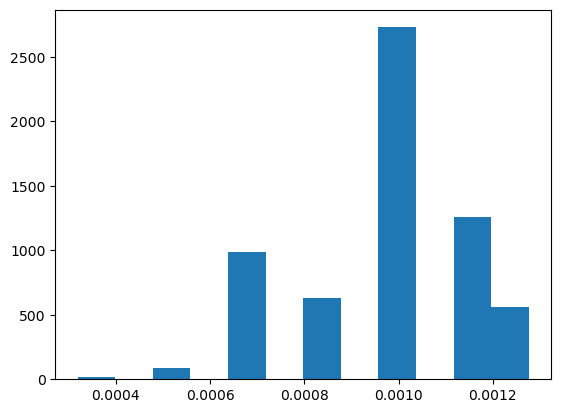

In [22]:
edge_centrality_degree_hist = list(edge_centrality_degree.values())
plt.hist(edge_centrality_degree_hist, bins = 12)
plt.savefig(r"images/edge_centrality_degree_hist.png")
plt.show()

The histogram for degree centrality is often a non-symmetric distribution that is skewed to the right or left, depending on the network's topology. This indicates that there are usually a few highly connected nodes (with a high degree centrality) and many nodes with lower degrees of connectivity.

In [25]:
df_od_metrics = pd.DataFrame(edge_centrality_closeness.keys(), columns = ['origin', 'destination','weight'])

In [27]:
df_od_metrics

,origin,destination,weight
0,660700043,7907995410,0
1,7907995410,7922801439,0
2,7907995410,660700045,0
3,660700043,7907995419,0
4,7907995419,3774523272,0
...,...,...,...
6267,10287157242,10287157243,0
6268,10696462808,10696462796,0
6269,10696462824,10696462809,0
6270,10696462826,10696462825,0


In [28]:
origin = 660700043
destination = 10696462836

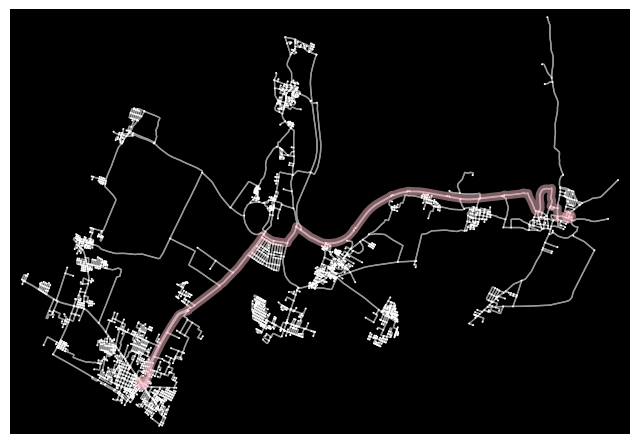

In [32]:
route = nx.shortest_path(G, origin, destination)
fig, ax = ox.plot_graph_route(G, route, route_color='pink', route_linewidth=6,
                              node_color='#fff', node_size = 2, bgcolor='k')

In [53]:
# Calculate the shortest path length between the origin and destination nodes
length = nx.shortest_path_length(G, origin, destination, weight='length')
print('length is', round(length/1000,2),'KM')

length is 14.97 KM
